# Project: Movie Dataset Project

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

# Introduction:
    

In [1]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = "retina"
import nbconvert
import nbformat

# LOAD DATA INTO THE SYSTEM

In [2]:
#READ DATA
df_movie=pd.read_csv('tmdb-movies.csv')

# DATA ASSESSMENT

In [3]:
df_movie.shape

(10865, 21)

In [4]:
df_movie.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:

# check the empties columm
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df_movie.duplicated().sum()

0

# data Cleaning

In [7]:
#Remove all the unwanted columns
df_movie.drop(['imdb_id', 'homepage', 'budget_adj', 'revenue_adj'],axis=1, inplace=True)

In [8]:
# confirm if the columns has been removed
df_movie.head(1)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [9]:
df_movie.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [10]:
df_movie.duplicated().sum()

0

In [11]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 17 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(9)
memory usage: 1.4+ MB


I created a list called del_list that contains Budget & Revenue. replace the 0s with NAM and drop all the columns with NANm

In [12]:

# create new column for revenue and budget
del_list=['budget', 'revenue']

# Replace all the value from '0' to NAN in the list
df_movie[del_list] = df_movie[del_list].replace(0, np.NAN)

#Removing all the row which has NaN value 
df_movie.dropna(subset = del_list, inplace = True)

In [13]:
df_movie.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [14]:
df_movie.shape

(3854, 17)

In [15]:
# CHECK IF THERE EMPTY IN THE RUNTIME COLUMN
df_movie[df_movie.runtime.isnull() == True]

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


# CONVERT RELEASE DATE TO DATETIME

In [16]:
df_movie.release_date = pd.to_datetime(df_movie['release_date'])

In [17]:
df_movie.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

# CONVERT BUDGET AND REVENUE COLUMNS TO INT FROM FLOAT

In [18]:
df_movie['budget'] = df_movie['budget'].astype(int)
df_movie['revenue'] = df_movie['revenue'].astype(int)

In [19]:
df_movie.dtypes

id                               int64
popularity                     float64
budget                           int32
revenue                          int32
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [20]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10847
Data columns (total 17 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
budget                  3854 non-null int32
revenue                 3854 non-null int32
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
tagline                 3574 non-null object
keywords                3716 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(8)
memory usage: 511.9+ KB


In [21]:
df_movie.head(1)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


# we need to know the profit of each movie. so, therefore we need to calculate the profit

In [22]:
# to calculate the profit;we need to substract budget from revenue 
df_movie.insert(4, "profit", df_movie["revenue"]- df_movie['budget'])

In [23]:
# confirming the profit column
df_movie.head(1)

,id,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


# DEFINING FUNCTIONS

In [24]:
# check which genres has | as divider
genres_hb = df_movie[df_movie['genres'].str.contains('|')]
genres_hb.head(1)

,id,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [25]:
 #write function that slipt all the columns that are divided by | e.g genres
def slipt(column):
    #will take a column, and separate the string by '|'
    slipt = genres_hb[column].str.cat(sep = '|')
    slipt = pd.Series(slipt.split('|'))
    count = slipt.value_counts(ascending = False)
    
    return count

In [26]:
def movie_calculation(column):
    # Highest profit calculation
    hightest_profit= df_movie[column].idxmax()
    hightest_profit_information= pd.DataFrame(df_movie.loc[hightest_profit])
    
    #lowest profit calculation 
    lowest_profit= df_movie[column].idxmin()
    lowest_profit_information= pd.DataFrame(df_movie.loc[lowest_profit])
    
    # Agregation of profit information
    Over_Raw_Information = pd.concat([hightest_profit_information, lowest_profit_information], axis=1) 
    
    return Over_Raw_Information

# Exploratory Data Analysis

In [27]:
#The highest profit made
df_movie.profit.max()

1910483648

In [28]:
# Lost
df_movie.profit.min()

-413912431

In [29]:
df_movie.groupby("profit").mean().max()

id              4.178590e+05
popularity      3.298576e+01
budget          4.250000e+08
revenue         2.068178e+09
runtime         3.380000e+02
vote_count      9.767000e+03
vote_average    8.400000e+00
release_year    2.015000e+03
dtype: float64

In [30]:
df_movie.groupby("profit").mean().min()

id              5.000000e+00
popularity      1.117000e-03
budget          1.000000e+00
revenue        -2.147484e+09
runtime         2.600000e+01
vote_count      1.000000e+01
vote_average    2.200000e+00
release_year    1.960000e+03
dtype: float64

In [31]:
 # check if there is any uunique value popularity in revenue
Unique_Pop = df_movie.query('popularity in ["revenue"]').genres.nunique()
Unique_Pop

0

In [32]:
movie_median= df_movie.groupby(['budget', 'revenue']).median()
movie_median.head(5)

id  popularity  profit  runtime  vote_count  \
budget revenue                                                     
1      100      39964.0    0.090186      99     95.0        14.0   
       1378     59296.0    0.520430    1377     90.0        55.0   
2      16       14373.0    0.464188      14     88.0        27.0   
3      16       20701.0    0.317091      13     93.0        37.0   
       43       39356.0    0.028456      40     87.0        26.0   

                vote_average  release_year  
budget revenue                              
1      100               4.8        1999.0  
       1378              5.3        2011.0  
2      16                5.6        1982.0  
3      16                5.8        1990.0  
       43                7.3        2010.0

# Research Question 1: Display the Movie with Highest & Lowest Budget

In [33]:
# The movie with highest budget and lowest budget 
max_min_budget= movie_calculation("budget")
max_min_budget=max_min_budget.rename(columns={2243:'Highest Budget', 2617 : "Lowest Budget"})
max_min_budget

,Highest Budget,Lowest Budget
id,46528,39964
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring


# Research Question 2: Display the Movie with Highest & Lowest Profit


In [34]:
# Movie with highest profit and low profit
max_min_profit= movie_calculation("profit")
max_min_profit=max_min_profit.rename(columns={1386:'Highest Profit', 2243 : "Lowest Profit"})
max_min_profit

,Highest Profit,Lowest Profit
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,-2147483648,11087569
profit,1910483648,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed


# Research Question 3: Display the Movie with Highest & Lowest Runtime

In [35]:
#Calculate the highest and the lowest run time.
max_min_runtime= movie_calculation("runtime")
max_min_runtime=max_min_runtime.rename(columns={2106:'Highest Runtime', 5161: "Lowest Runtime"})
max_min_runtime

,Highest Runtime,Lowest Runtime
id,43434,24914
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
keywords,gun|car bomb|tv mini-series|terrorism|opec,NaN


# Research Question 4 : Display the Movie with Highest & Lowest Popularity

In [36]:
max_min_popularity= movie_calculation("popularity")
max_min_popularity=max_min_popularity.rename(columns={0:'Highest Popularity', 7267: "Lowest Popularity"})
max_min_popularity

,Highest Popularity,Lowest Popularity
id,135397,1392
popularity,32.9858,0.001117
budget,150000000,350000
revenue,1513528810,3515061
profit,1363528810,3165061
original_title,Jurassic World,Born into Brothels
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni
director,Colin Trevorrow,Zana Briski|Ross Kauffman
tagline,The park is open.,NaN
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,prostitute|red-light disctrict|human trafficki...


# Research Question 5  Display 5 top Genres

In [37]:
# Display 5 top Genres
genres_df= slipt("genres")
genres_df.head(5)

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
dtype: int64

In [38]:
#Display where Genres is Drama
df_drama= df_movie.query('genres =="Drama"')
df_drama.shape

(245, 18)

# Research Question 6:  Display 10 most freguency Actors

In [39]:
# Display 10 top casters 
cast_df= slipt("cast")
cast_df.head(10)

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Harrison Ford         34
Tom Hanks             34
Sylvester Stallone    34
Brad Pitt             34
dtype: int64

# Research Question 7: Average money spent in producing different Genres

In [40]:
revenue_inprovement = df_movie.groupby('genres').revenue.mean()
revenue_inprovement.head(10)

genres
Action                                                 1.104887e+08
Action|Adventure                                       7.877674e+07
Action|Adventure|Animation|Family|Fantasy              5.549875e+08
Action|Adventure|Animation|Family|Science Fiction      6.314421e+08
Action|Adventure|Animation|Science Fiction             5.231128e+06
Action|Adventure|Animation|Science Fiction|Thriller    4.842806e+07
Action|Adventure|Comedy                                5.303560e+07
Action|Adventure|Comedy|Crime                          1.192552e+08
Action|Adventure|Comedy|Crime|Drama                    1.528508e+08
Action|Adventure|Comedy|Crime|Thriller                 1.489030e+08
Name: revenue, dtype: float64

In [41]:
revenue_inprovement_max = df_movie.groupby('genres').revenue.mean().max()
revenue_inprovement_max

2068178225.0

In [42]:
revenue_inprovement_min = df_movie.groupby('genres').revenue.mean().min()
revenue_inprovement_min

-78337.71428571429

# Research Question 8 :Profit made in each Genres

In [43]:
profit_inprovement = df_movie.groupby('genres').profit.mean()
profit_inprovement.head(5)

genres
Action                                               5.278598e+07
Action|Adventure                                     2.686007e+07
Action|Adventure|Animation|Family|Fantasy            4.249875e+08
Action|Adventure|Animation|Family|Science Fiction    5.394421e+08
Action|Adventure|Animation|Science Fiction           1.731128e+06
Name: profit, dtype: float64

In [44]:
profit_inprovement_max = df_movie.groupby('genres').profit.mean().max()
profit_inprovement_max

1868178225.0

In [45]:
profit_inprovement_min = df_movie.groupby('genres').profit.mean().min()
profit_inprovement_min

-413912431.0

# Research Question 9: Top 10 keywords used

In [46]:
keywords_df= slipt("keywords")
keywords_df.head(10)

based on novel          168
duringcreditsstinger    101
dystopia                 95
sex                      90
independent film         86
new york                 85
sport                    75
prison                   75
murder                   70
woman director           70
dtype: int64

# Research Question 10:  Display Top 10 Directors 

In [47]:
director_df= slipt("director")
director_df.head(10)

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Robert Rodriguez     17
Tim Burton           17
Martin Scorsese      17
Steven Soderbergh    17
Oliver Stone         15
Brian De Palma       15
dtype: int64

# Research Question 11 : Display  10 Movie Production Company

In [48]:
production_companies_df= slipt("production_companies")
production_companies_df.head(10)

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
New Line Cinema                           152
Walt Disney Pictures                      117
Touchstone Pictures                       116
Metro-Goldwyn-Mayer (MGM)                 109
Relativity Media                          102
dtype: int64

In [49]:
df_movie['profit'].idxmax()

1386

# Research Question 12:Movie with over $1b profit

In [50]:
budget_high = df_movie[df_movie['profit'] >= 1000000000]

In [51]:
budget_high.describe()

,id,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year
count,13.000000,13.000000,1.300000e+01,1.300000e+01,1.300000e+01,13.000000,13.000000,13.000000,13.000000
mean,76399.307692,8.715231,1.647692e+08,1.146883e+09,1.312496e+09,138.846154,4834.692308,7.115385,2009.846154
std,72552.954106,7.721927,7.162071e+07,1.029334e+09,3.079763e+08,31.774849,2375.129940,0.614880,7.021944
min,122.000000,1.136610,2.200000e+07,-2.147484e+09,1.015440e+09,91.000000,201.000000,5.600000,1995.000000
25%,12445.000000,5.711315,1.250000e+08,1.156731e+09,1.084280e+09,124.000000,3369.000000,6.900000,2009.000000
50%,68721.000000,7.122455,1.900000e+08,1.327818e+09,1.202818e+09,136.000000,4654.000000,7.300000,2013.000000
75%,135397.000000,9.335014,2.000000e+08,1.513529e+09,1.363529e+09,143.000000,5636.000000,7.500000,2015.000000
max,211672.000000,32.985763,2.800000e+08,2.068178e+09,1.910484e+09,201.000000,8903.000000,7.900000,2015.000000


# Research Question 13: Movie with less $1b profit

In [52]:
budget_low = df_movie[df_movie['profit'] <= 1000000000]
budget_low.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
5,281957,9.110700,135000000,532950503,397950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015
6,87101,8.654359,155000000,440603537,285603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015
7,286217,7.667400,108000000,595380321,487380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015


In [53]:
budget_low.describe()

,id,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year
count,3841.000000,3841.000000,3.841000e+03,3.841000e+03,3.841000e+03,3841.000000,3841.000000,3841.000000,3841.000000
mean,39764.612080,1.166090,3.677195e+07,1.028862e+08,6.611422e+07,109.120021,513.143192,6.164957,2001.231971
std,67180.268025,1.343447,4.142775e+07,1.540915e+08,1.285027e+08,19.802170,834.448609,0.793605,11.283749
min,5.000000,0.001117,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,10.000000,2.200000,1960.000000
25%,6073.000000,0.461807,1.000000e+07,1.352183e+07,-1.346379e+06,95.000000,70.000000,5.700000,1995.000000
50%,11309.000000,0.795762,2.400000e+07,4.443444e+07,1.984818e+07,105.000000,203.000000,6.200000,2004.000000
75%,38448.000000,1.362379,5.000000e+07,1.229151e+08,8.045599e+07,119.000000,569.000000,6.700000,2010.000000
max,417859.000000,28.419936,4.250000e+08,1.123747e+09,9.287470e+08,338.000000,9767.000000,8.400000,2015.000000


In [54]:
# View the min, 25%, 50%, 75%, max popularity with Pandas describe
df_movie.describe().popularity

count    3854.000000
mean        1.191554
std         1.475162
min         0.001117
25%         0.462368
50%         0.797511
75%         1.368324
max        32.985763
Name: popularity, dtype: float64

In [55]:
# View the min, 25%, 50%, 75%, max budget with Pandas describe
df_movie.describe().budget

count    3.854000e+03
mean     3.720370e+07
std      4.220822e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [56]:
# View the min, 25%, 50%, 75%, max profit with Pandas describe
df_movie.describe().profit

count    3.854000e+03
mean     7.031841e+07
std      1.482442e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      1.910484e+09
Name: profit, dtype: float64

# Research Question 14: Which movie receives the highest average voting?

In [57]:
df_movie.describe().vote_average

count    3854.000000
mean        6.168163
std         0.794920
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [58]:
# vote_cut that will be used to "cut" the data into groups
vote_cut = [2.20, 5.70, 6.20, 6.70, 8.0]
# Labels for the four movie  groups
vote_name = ['high', 'mod_high', 'medium', 'low'] 
# Creates acidity_levels column
df_movie['vote_rating'] = pd.cut(df_movie['vote_average'], vote_cut, labels=vote_name)
df_movie

,id,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,vote_rating
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,medium
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,low
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,medium
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,low
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,low
5,281957,9.110700,135000000,532950503,397950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,low
6,87101,8.654359,155000000,440603537,285603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,mod_high
7,286217,7.667400,108000000,595380321,487380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,low
8,211672,7.404165,74000000,1156730962,1082730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,medium
9,150540,6.326804,175000000,853708609,678708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,low


In [59]:
df_movie.groupby('vote_rating').mean().profit

vote_rating
high        2.869593e+07
mod_high    5.940141e+07
medium      7.563010e+07
low         1.262176e+08
Name: profit, dtype: float64

In [60]:
df_movie.groupby('vote_rating').mean().budget

vote_rating
high        3.571943e+07
mod_high    3.926900e+07
medium      3.717550e+07
low         3.684992e+07
Name: budget, dtype: float64

In [61]:
df_movie.groupby('vote_rating').mean().revenue

vote_rating
high        6.441536e+07
mod_high    9.867041e+07
medium      1.128056e+08
low         1.582579e+08
Name: revenue, dtype: float64

# PLOTTING

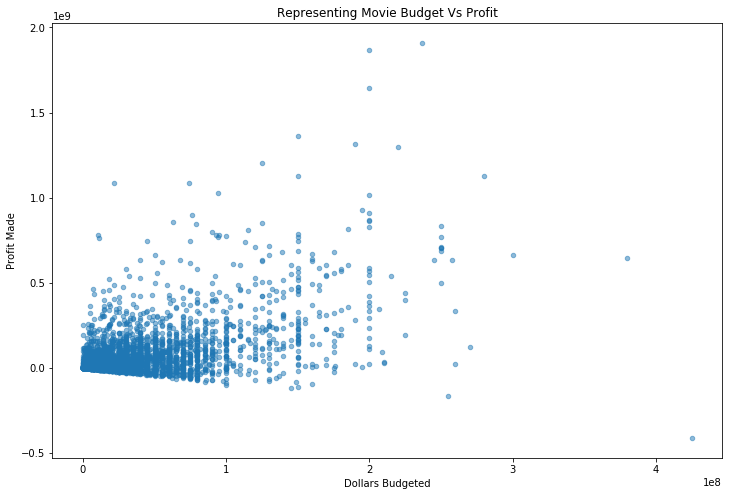

In [62]:
df_movie.plot.scatter(x= "budget", y= "profit", figsize= (12,8), alpha= 0.5)
# On X Axis
plt.xlabel("Dollars Budgeted", fontsize= 10)
# On Y Axis
plt.ylabel("Profit Made", fontsize= 10)
# Title of the line plot
plt.title("Representing Movie Budget Vs Profit");

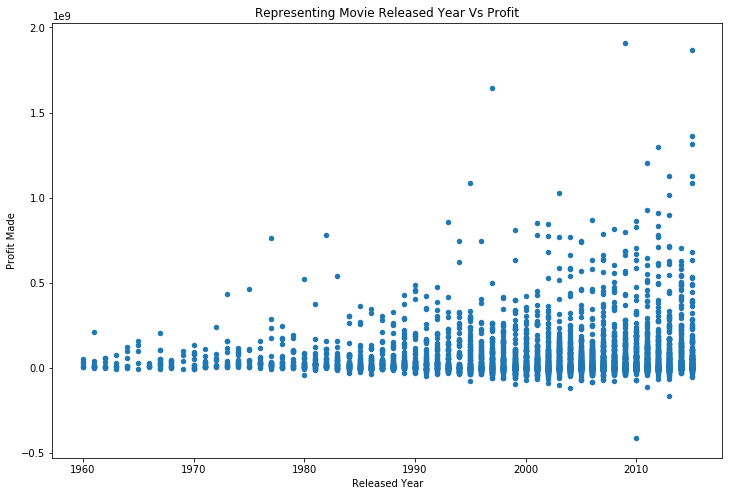

In [63]:
df_movie.plot.scatter(x= "release_year", y= "profit", figsize= (12,8), alpha= 1)
# On X Axis
plt.xlabel("Released Year", fontsize= 10)
# On Y Axis
plt.ylabel("Profit Made", fontsize= 10)
# Title of the line plot
plt.title("Representing Movie Released Year Vs Profit");

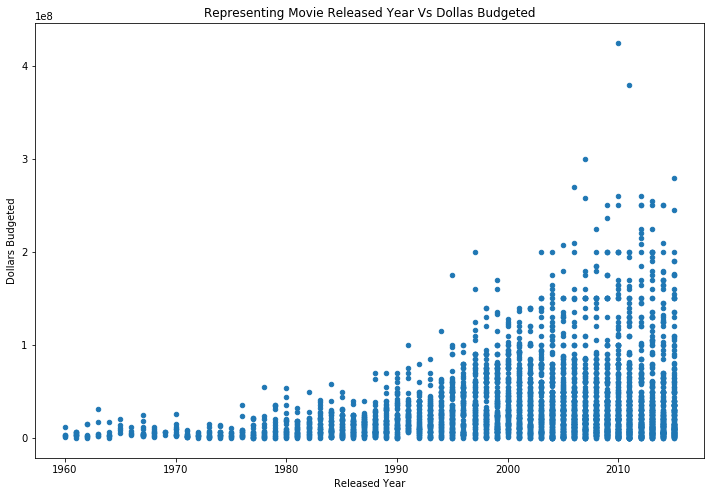

In [64]:
df_movie.plot.scatter(x= "release_year", y= "budget", figsize= (12,8), alpha= 1)
# On X Axis
plt.xlabel("Released Year", fontsize= 10)
# On Y Axis
plt.ylabel("Dollars Budgeted", fontsize= 10)
# Title of the line plot
plt.title("Representing Movie Released Year Vs Dollas Budgeted");

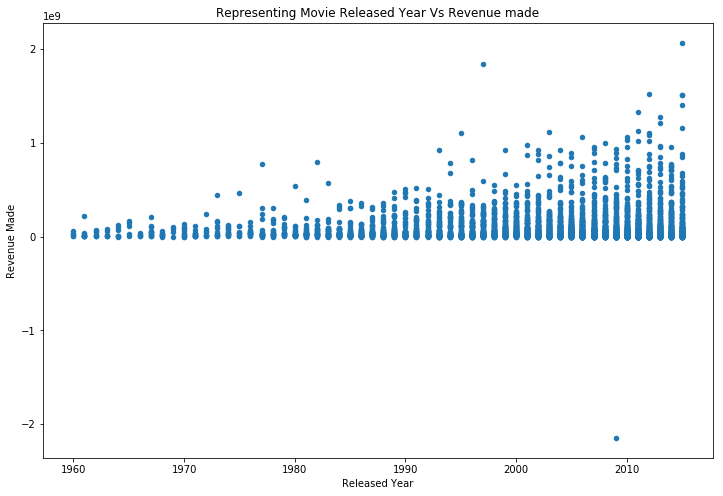

In [65]:
df_movie.plot.scatter(x= "release_year", y= "revenue", figsize= (12,8), alpha= 1)
# On X Axis
plt.xlabel("Released Year", fontsize= 10)
# On Y Axis
plt.ylabel("Revenue Made", fontsize= 10)
# Title of the line plot
plt.title("Representing Movie Released Year Vs Revenue made");

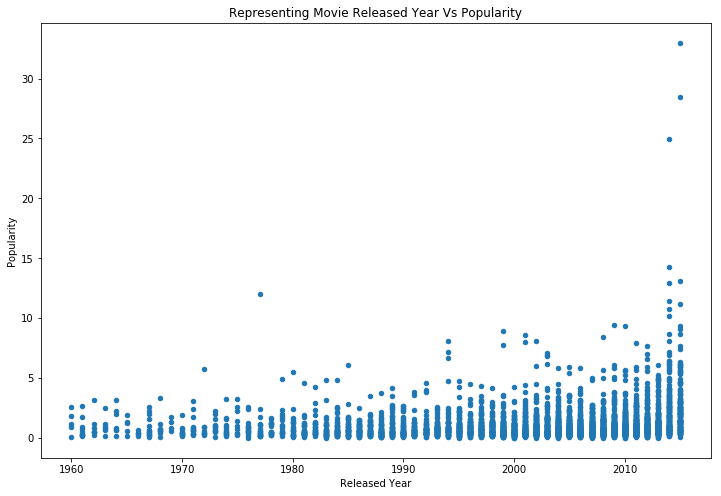

In [66]:
df_movie.plot.scatter(x= "release_year", y= "popularity", figsize= (12,8), alpha= 1)
# On X Axis
plt.xlabel("Released Year", fontsize= 10)
# On Y Axis
plt.ylabel("Popularity", fontsize= 10)
# Title of the line plot
plt.title("Representing Movie Released Year Vs Popularity");

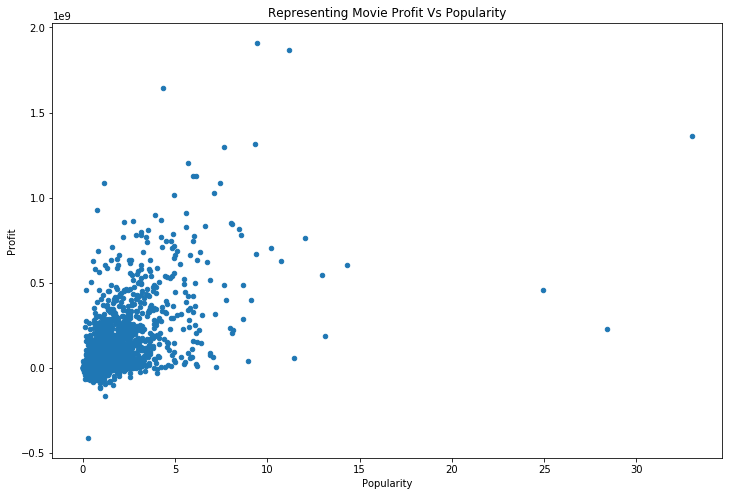

In [67]:
df_movie.plot.scatter(x= "popularity", y= "profit", figsize= (12,8), alpha= 1)
# On X Axis
plt.xlabel("Popularity", fontsize= 10)
# On Y Axis
plt.ylabel("Profit", fontsize= 10)
# Title of the line plot
plt.title("Representing Movie Profit Vs Popularity");

In [68]:
df_movie.head(1)

,id,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,vote_rating
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,medium


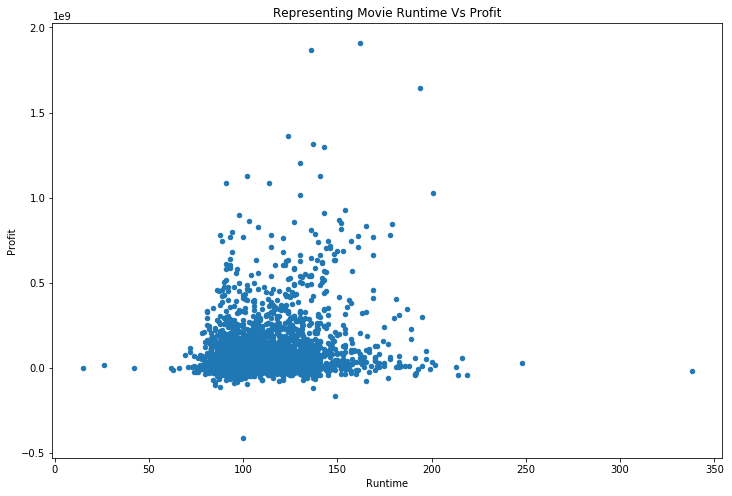

In [69]:
df_movie.plot.scatter(x= "runtime", y= "profit", figsize= (12,8), alpha= 1)
# On X Axis
plt.xlabel("Runtime", fontsize= 10)
# On Y Axis
plt.ylabel("Profit", fontsize= 10)
# Title of the line plot
plt.title("Representing Movie Runtime Vs Profit");

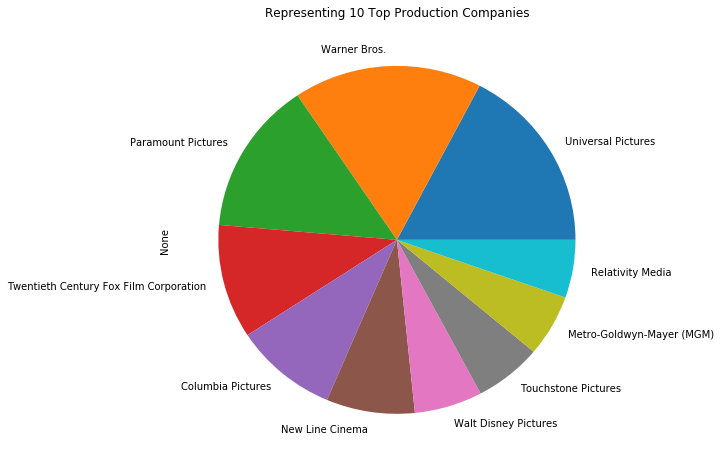

In [70]:
production_companies_df.head(10).plot.pie( figsize= (8,8));

# Title of the line plot
plt.title("Representing 10 Top Production Companies");


# The Percentage of The Vote Rating

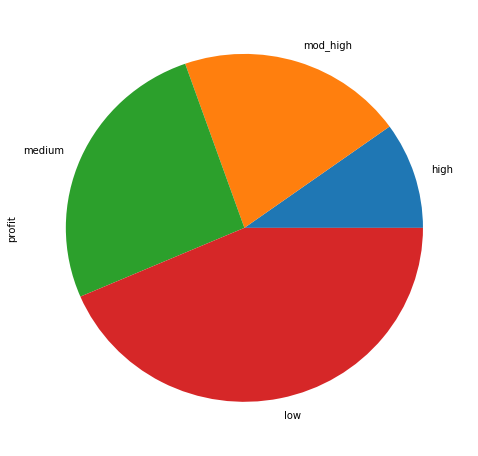

In [71]:

df_movie.groupby('vote_rating').mean().profit.plot.pie( figsize= (8,8));

# The sharing movies among top 10 Directors

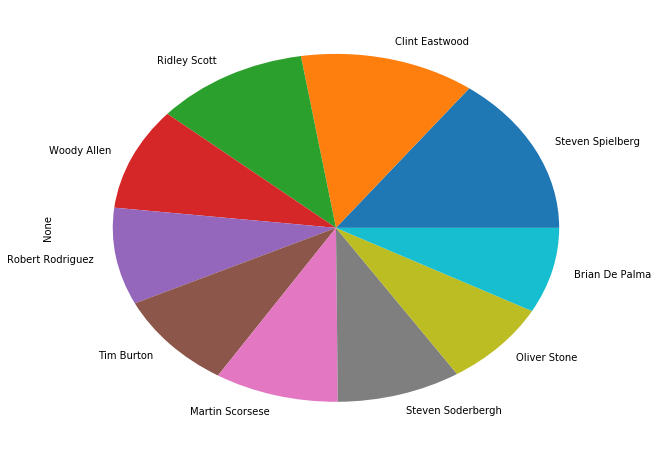

In [72]:
director_df.head(10).plot.pie( figsize= (10,8));

# The percentage of the 10 top used keywords

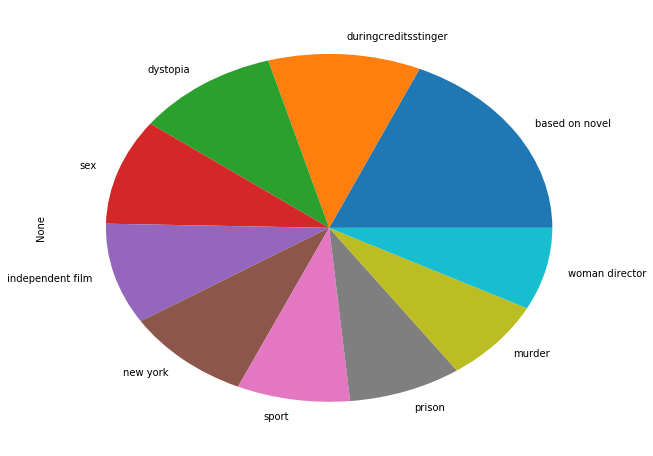

In [73]:
keywords_df.head(10).plot.pie( figsize= (10,8));

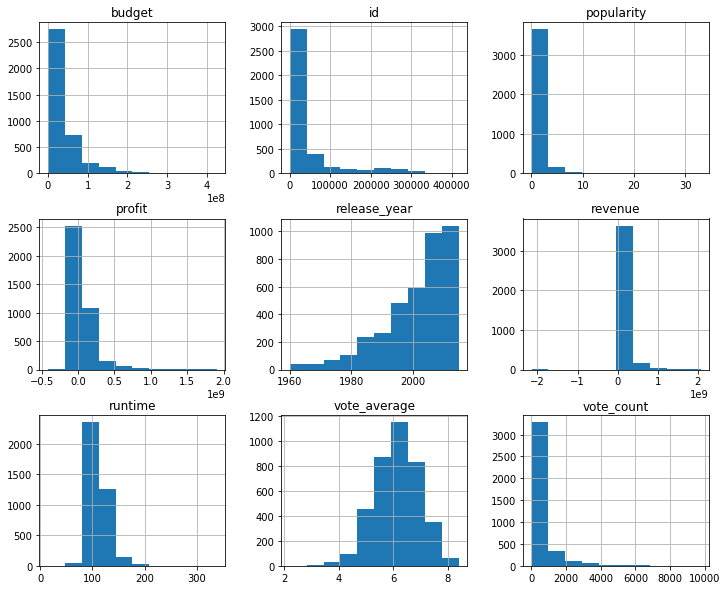

In [74]:
df_movie.hist(figsize=(12,10));

# Conclusions

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Movie_Dataset_project.ipynb'])

0